'm importing necessary libraries

In [67]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point 

'm opening and reading my data file 

In [68]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()),'data/program_data/us_program_data.csv'))

iewing the first 10 rows of the data

In [69]:
print(data.head(10))

                                             program  \
0  Interruptible Power at Secondary Voltage (Alaska)   
1         Peak Solutions ProgramnDay Ahead (Arizona)   
2             Peak Solutions Program Day Of(Arizona)   
3            Interruptible Service Program (Arizona)   
4            Smart Demand Response Program (Arizona)   
5       Base Interruptible Program (15) (California)   
6       Base Interruptible Program (30) (California)   
7  Emergency Load Reduction Program (day of) (Cal...   
8  Emergency Load Reduction Program (day ahead) (...   
9  Reliability Demand Response Resource Real Time...   

                                        program_link program_rate state  \
0  https://www.chugachelectric.com/system/files/r...         rate    AK   
1                      https://cpowerenergy.com/aps/      program    AZ   
2                      https://cpowerenergy.com/aps/     program     AZ   
3  https://docs.tep.com/wp-content/uploads/712-Ri...         rate    AZ   
4       

Printing the column names to check for discrepancies

In [70]:
print("Column names in the CSV file:")
print(data.columns)

Column names in the CSV file:
Index(['program', 'program_link', 'program_rate', 'state', 'comp', 'util',
       'load ', 'trigger', 'region', 'season', 'sm', 'em', 'dow', 'min_days',
       'max_events', 'max_days', 'min_dur', 'max_dur', 'start_time',
       'end_time', 'events_daily', 'max_consec', 'max_hours', 'notif_type',
       'notif_time', 'notif_delt', 'base_method', 'hist_pres', 'pay_function',
       'elig'],
      dtype='object')


Printing the program, company, state, region, and season columns

In [71]:
columns_for_season_histogram = ['program', 'comp', 'state', 'region', 'season']
print(data[columns_for_season_histogram].head(10))

                                             program                   comp  \
0  Interruptible Power at Secondary Voltage (Alaska)                Chugach   
1         Peak Solutions ProgramnDay Ahead (Arizona)                    APS   
2             Peak Solutions Program Day Of(Arizona)                    APS   
3            Interruptible Service Program (Arizona)  Tuscon Electric Power   
4            Smart Demand Response Program (Arizona)  Tuscon Electric Power   
5       Base Interruptible Program (15) (California)                   PG&E   
6       Base Interruptible Program (30) (California)                   PG&E   
7  Emergency Load Reduction Program (day of) (Cal...                   PG&E   
8  Emergency Load Reduction Program (day ahead) (...                   PG&E   
9  Reliability Demand Response Resource Real Time...                  CAISO   

  state region      season  
0    AK   west  year_round  
1    AZ   west      summer  
2    AZ   west      summer  
3    AZ   west

ounting the number of programs for each region 

In [72]:
region_counts = data['region'].value_counts()
print("Number of programs for each region:")
print(region_counts)

Number of programs for each region:
region
west         74
southeast    30
midwest      17
northeast    16
Name: count, dtype: int64


Counting the number of programs for each season

In [73]:
season_counts = data['season'].value_counts()
print("Number of programs for each season:")
print(season_counts)

Number of programs for each season:
season
summer        63
year_round    48
winter        24
Name: count, dtype: int64


Counting the number of programs for each season in each region

In [74]:
region_season_counts = data.groupby(['region', 'season']).size().reset_index(name='counts')
print("Number of programs for each season in each region:")
print(region_season_counts)

Number of programs for each season in each region:
       region      season  counts
0     midwest      summer       4
1     midwest      winter       5
2     midwest  year_round       8
3   northeast      summer      10
4   northeast  year_round       6
5   southeast      summer      12
6   southeast      winter      10
7   southeast  year_round       8
8        west      summer      37
9        west      winter       9
10       west  year_round      26


et font default to arial

In [75]:
plt.rcParams['font.family'] = 'Arial'

Plotting the histogram of prgrams per season 

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

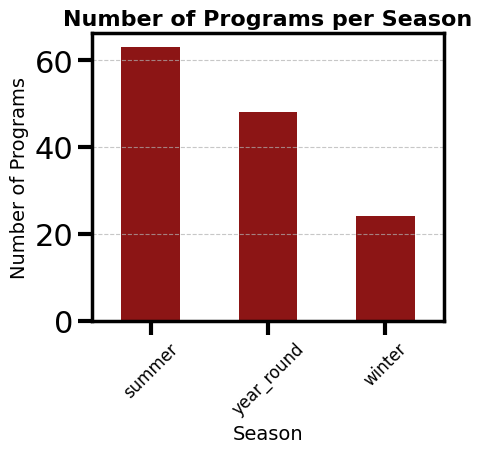

In [76]:
plt.figure(figsize=(5, 5))
season_counts.plot(kind='bar', color='#8c1515')
plt.title('Number of Programs per Season', fontweight='bold', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of Programs', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.show()

Calculating the total number of programs in each region

In [77]:
region_totals = region_season_counts.groupby('region')['counts'].sum().reset_index(name='total_counts')

Merging the total counts back to the region_season_counts

In [78]:
region_season_counts = region_season_counts.merge(region_totals, on='region')

Calculating the percentage of each season within each region

In [79]:
region_season_counts['percentage'] = (region_season_counts['counts'] / region_season_counts['total_counts']) * 100

Pivoting the data for plotting

In [80]:
pivot_data = region_season_counts.pivot(index='region', columns='season', values='percentage').fillna(0)

Plotting the stacked bar chart

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

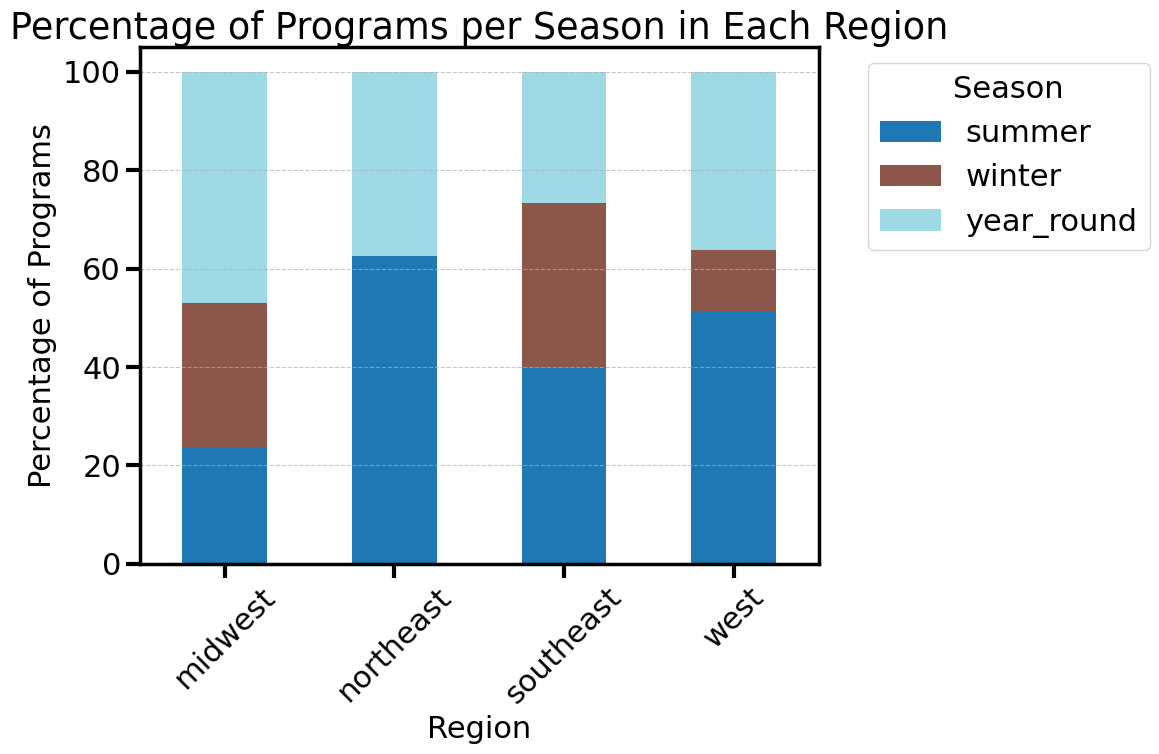

In [81]:
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Percentage of Programs per Season in Each Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Programs')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.show()

able for seasons per state <br>
Clean the data

In [82]:
data['season'] = data['season'].str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)
data['state'] = data['state'].str.strip().str.upper()  # Ensure state abbreviations are uppercase

Filter the data for the seasons you are interested in, including 'year_round'

In [83]:
seasons_of_interest = ['summer', 'winter', 'spring', 'fall', 'year_round']
filtered_data = data[data['season'].isin(seasons_of_interest)]

Group and count the number of programs per state for each season

In [84]:
program_counts = filtered_data.groupby(['state', 'season']).size().reset_index(name='program_count')

Pivot the data to create a table format

In [85]:
pivot_table = program_counts.pivot(index='state', columns='season', values='program_count').fillna(0)

Display the table

In [86]:
print(pivot_table)

season  summer  winter  year_round
state                             
AK         0.0     0.0         1.0
AL         0.0     0.0         2.0
AR         2.0     2.0         0.0
AZ         3.0     0.0         0.0
CA        10.0     3.0         3.0
CO         7.0     6.0         1.0
CT         2.0     0.0         0.0
DC         0.0     0.0         1.0
DE         1.0     0.0         0.0
FL         2.0     0.0         0.0
GA         1.0     0.0         0.0
HI         0.0     0.0         2.0
IA         0.0     0.0         2.0
ID         1.0     0.0         0.0
IL         0.0     0.0         1.0
IN         2.0     4.0         3.0
KY         0.0     0.0         2.0
MA         2.0     0.0         0.0
MD         0.0     0.0         1.0
MI         0.0     0.0         1.0
MN         1.0     0.0         2.0
MO         1.0     0.0         0.0
MS         0.0     0.0         1.0
MT         0.0     0.0         2.0
NC         2.0     4.0         3.0
ND         0.0     0.0         4.0
NE         5.0     0

Count the number of states to ensure none are missing

In [87]:
unique_states = data['state'].nunique()
print(f"Total number of unique states: {unique_states}")

Total number of unique states: 45


Plot the data

Text(0, 0.5, 'Number of Programs')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

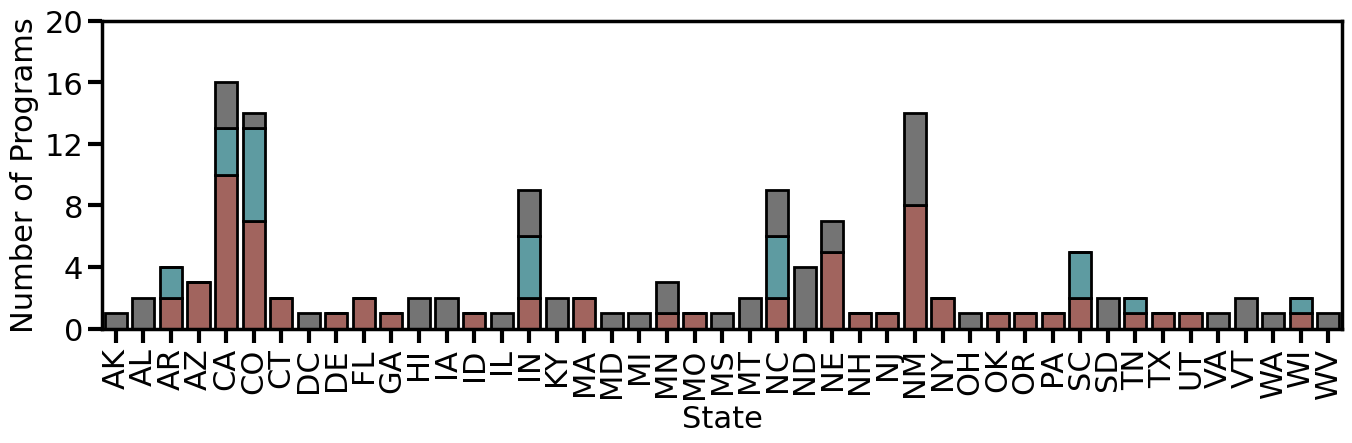

In [ ]:
plt.rcParams.update({'font.size': 22,
                    'xtick.major.size': 10,
                    'xtick.major.width': 3,
                    'ytick.major.size': 10,
                    'ytick.major.width': 3,
                    'axes.linewidth': 2.5,
                    'axes.edgecolor': 'black',})
fig, ax = plt.subplots(figsize=(16,4))
ax.bar(pivot_table.index, pivot_table['summer'], label='Summer', color='#A1645E', edgecolor='black', lw=2)
ax.bar(pivot_table.index, pivot_table['winter'], label='Winter', color='#5E9BA1', bottom=pivot_table['summer'], edgecolor='black', lw=2)
ax.bar(pivot_table.index, pivot_table['year_round'], label='Year-round', color='#747474', bottom=pivot_table['summer'] + pivot_table['winter'], edgecolor='black', lw=2)
ax.set(xticks=pivot_table.index, xticklabels=pivot_table.index, yticks=np.arange(0, 21, 4), xlim=(-0.5, len(pivot_table.index)-0.5), ylim=(0, 20))

# turn the x-axis labels 90 degrees
plt.xticks(rotation=90)
plt.xlabel('State',)
plt.ylabel('Number of Programs')
# plt.title('Number of Programs by Season in Each State', fontsize=12)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

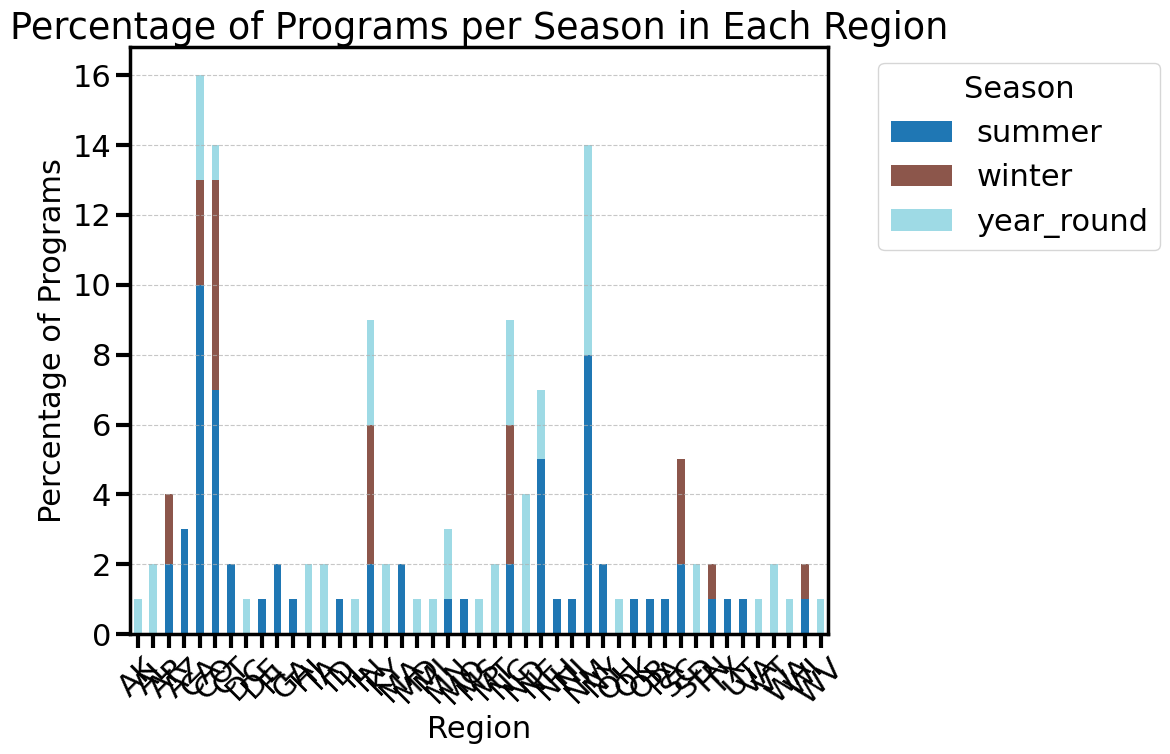

In [89]:
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Percentage of Programs per Season in Each Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Programs')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.show()

uration based on season<br>
Group by season and calculate the average minimum and maximum duration

In [90]:
avg_min_duration_by_season = filtered_data.groupby('season')['min_dur'].mean().reset_index()
avg_max_duration_by_season = filtered_data.groupby('season')['max_dur'].mean().reset_index()

Display the tables

In [91]:
print("Average Minimum Duration by Season:")
print(avg_min_duration_by_season)
print("\nAverage Maximum Duration by Season:")
print(avg_max_duration_by_season)

Average Minimum Duration by Season:
       season   min_dur
0      summer  2.562500
1      winter  3.400000
2  year_round  3.266667

Average Maximum Duration by Season:
       season   max_dur
0      summer  5.152174
1      winter  6.315789
2  year_round  6.000000


Plot the data for average minimum duration

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

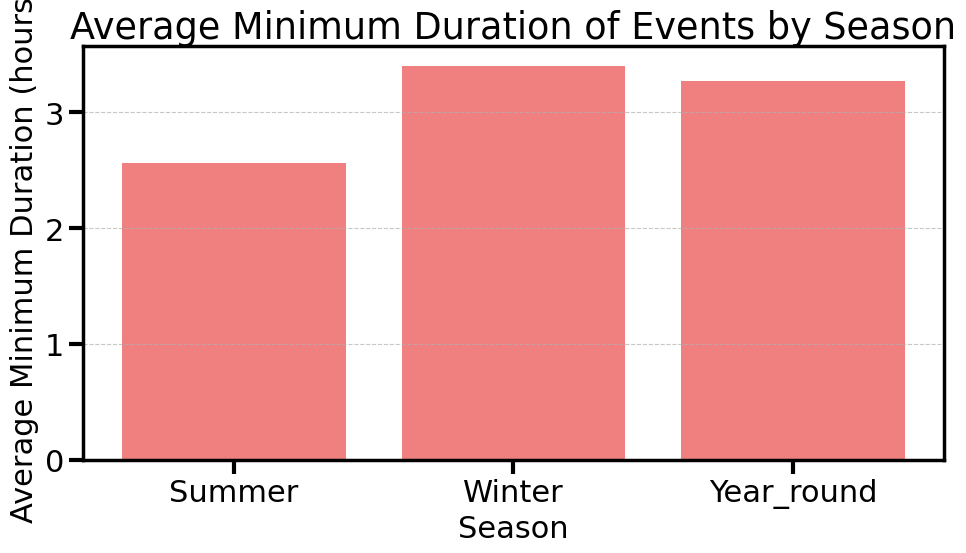

In [92]:
plt.figure(figsize=(10, 6))
plt.bar(avg_min_duration_by_season['season'].str.capitalize(), avg_min_duration_by_season['min_dur'], color='lightcoral')
plt.title('Average Minimum Duration of Events by Season')
plt.xlabel('Season')
plt.ylabel('Average Minimum Duration (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Plot the data for average maximum duration

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

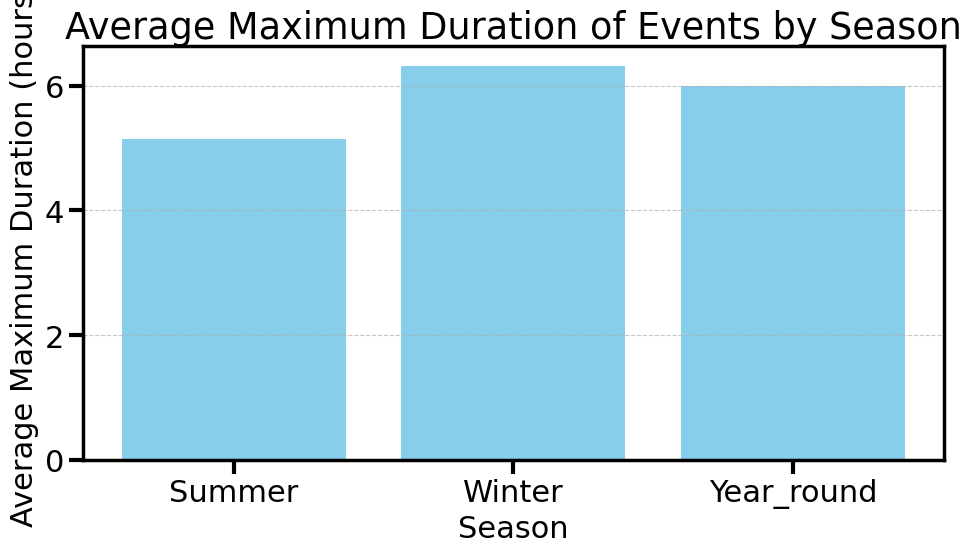

In [93]:
plt.figure(figsize=(10, 6))
plt.bar(avg_max_duration_by_season['season'].str.capitalize(), avg_max_duration_by_season['max_dur'], color='skyblue')
plt.title('Average Maximum Duration of Events by Season')
plt.xlabel('Season')
plt.ylabel('Average Maximum Duration (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

uration based on region <br>
Group by region and calculate the average minimum and maximum duration

In [94]:
avg_min_duration_by_region = filtered_data.groupby('region')['min_dur'].mean().reset_index()
avg_max_duration_by_region = filtered_data.groupby('region')['max_dur'].mean().reset_index()

Display the tables

In [95]:
print("Average Minimum Duration by Region:")
print(avg_min_duration_by_region)
print("\nAverage Maximum Duration by Region:")
print(avg_max_duration_by_region)

Average Minimum Duration by Region:
      region   min_dur
0    midwest  3.666667
1  northeast  3.272727
2  southeast  3.500000
3       west  2.468750

Average Maximum Duration by Region:
      region   max_dur
0    midwest  6.909091
1  northeast  4.818182
2  southeast  6.230769
3       west  5.121951


Plot the data for average minimum duration

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

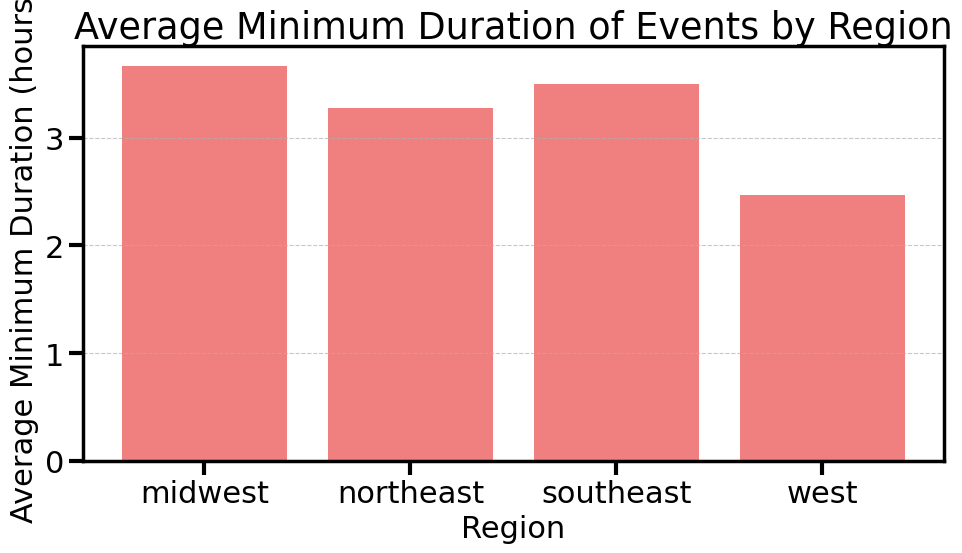

In [96]:
plt.figure(figsize=(10, 6))
plt.bar(avg_min_duration_by_region['region'], avg_min_duration_by_region['min_dur'], color='lightcoral')
plt.title('Average Minimum Duration of Events by Region')
plt.xlabel('Region')
plt.ylabel('Average Minimum Duration (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Plot the data for average maximum duration

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

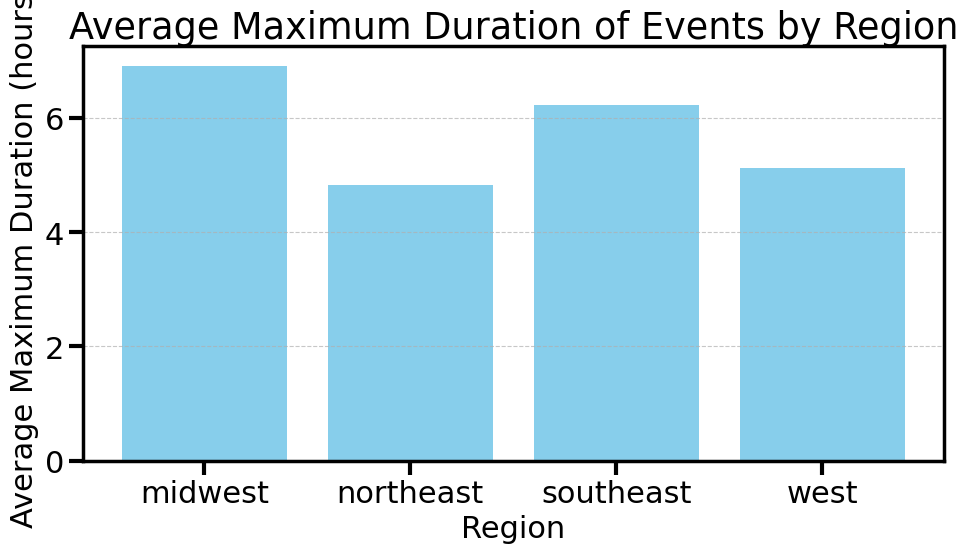

In [97]:
plt.figure(figsize=(10, 6))
plt.bar(avg_max_duration_by_region['region'], avg_max_duration_by_region['max_dur'], color='skyblue')
plt.title('Average Maximum Duration of Events by Region')
plt.xlabel('Region')
plt.ylabel('Average Maximum Duration (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ox and whisker plots for duration variables by region 

In [98]:
import seaborn as sns

Combine min_dur and max_dur into a single DataFrame

In [99]:
duration_data = filtered_data[['region', 'min_dur', 'max_dur']]

Melt the DataFrame to have a long format

In [100]:
melted_duration_data = duration_data.melt(id_vars=['region'], value_vars=['min_dur', 'max_dur'], 
                                          var_name='Duration Type', value_name='Duration')

Create the box and whisker plot

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

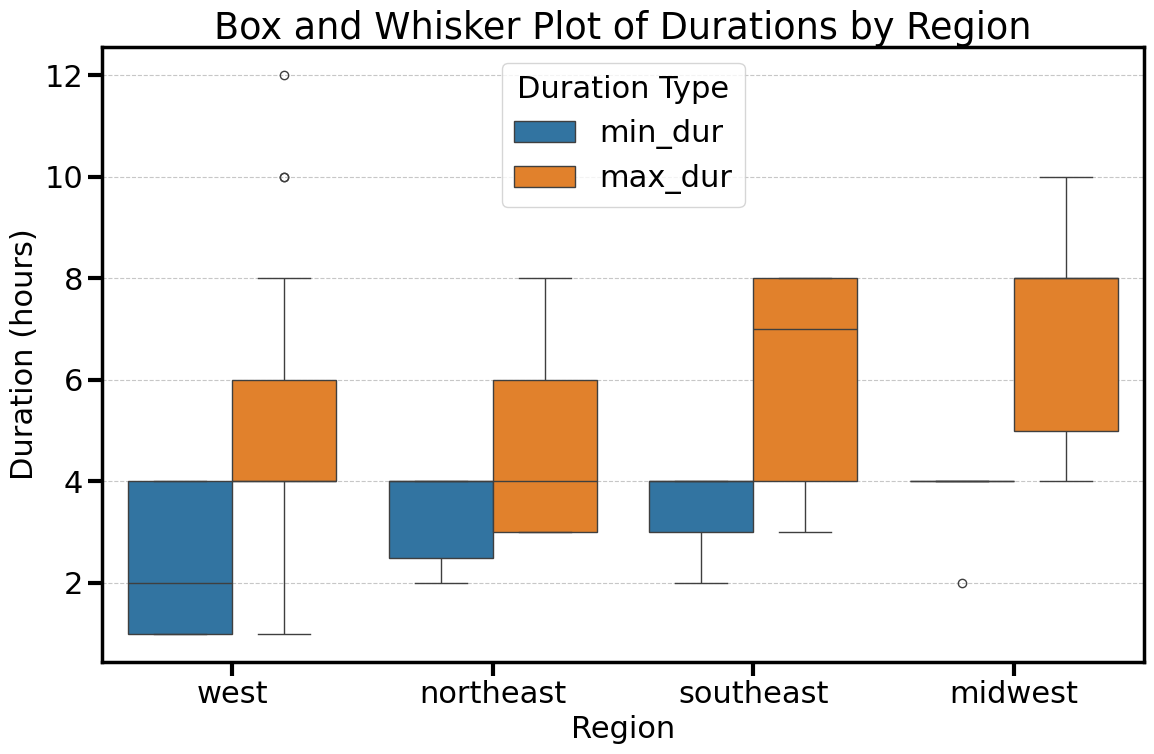

In [101]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='Duration', hue='Duration Type', data=melted_duration_data)
plt.title('Box and Whisker Plot of Durations by Region')
plt.xlabel('Region')
plt.ylabel('Duration (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ox and whisker plots for duration variables by season<br>
Ensure 'season' column is in the filtered_data DataFrame<br>
filtered_data['season'] should already exist or be created based on your data

Combine min_dur and max_dur into a single DataFrame

In [102]:
duration_data = filtered_data[['season', 'min_dur', 'max_dur']]

Melt the DataFrame to have a long format

In [103]:
melted_duration_data = duration_data.melt(id_vars=['season'], value_vars=['min_dur', 'max_dur'], 
                                          var_name='Duration Type', value_name='Duration')

Create the box and whisker plot

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

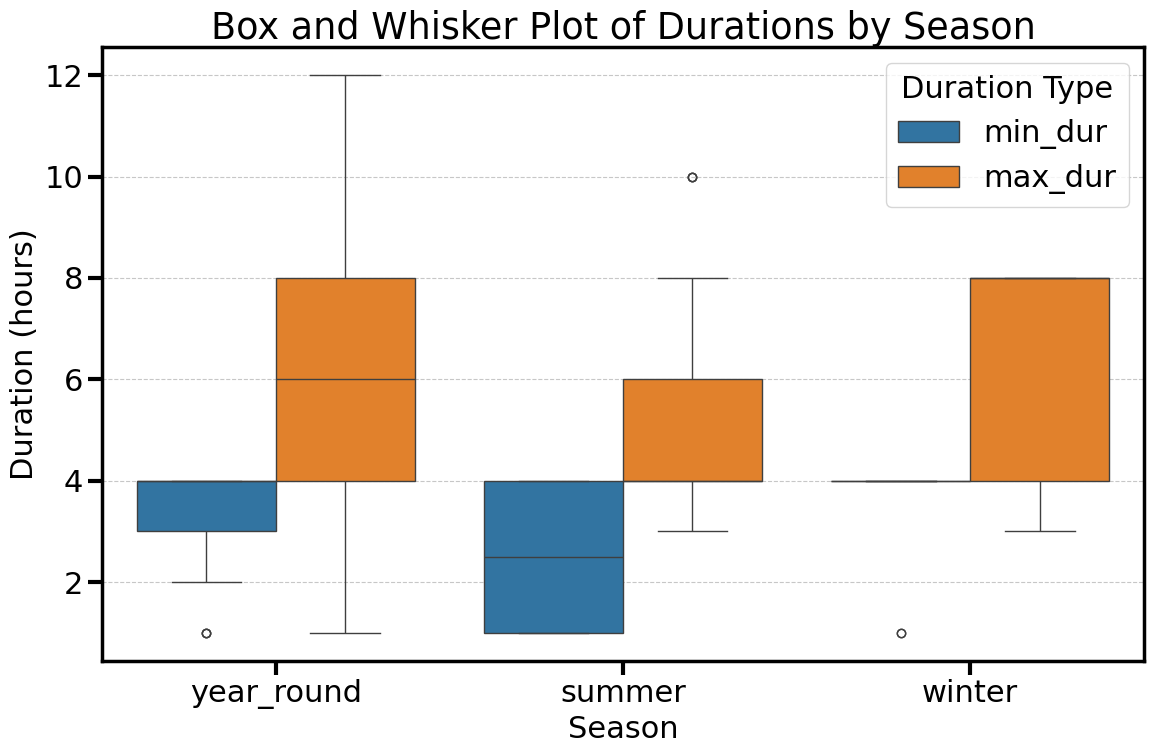

In [104]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='season', y='Duration', hue='Duration Type', data=melted_duration_data)
plt.title('Box and Whisker Plot of Durations by Season')
plt.xlabel('Season')
plt.ylabel('Duration (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Creating a box and whisker plot with region and season for max duration

In [138]:
# Calculate the minimum and maximum durations per season for each region
durations = data.groupby(['region', 'season'])['max_dur'].agg(['min', 'max']).reset_index()

# Melt the DataFrame to long format for seaborn
durations_melted = durations.melt(id_vars=['region', 'season'], value_vars=['min', 'max'], var_name='duration_type', value_name='duration')

# replace the region names such that the first letter is capitalized
durations_melted['region'] = durations_melted['region'].str.capitalize()

# replace the regions with shortened names
region_mapping = {
    'Northeast': 'NE',
    'Southeast': 'SE',
    'Midwest': 'MW',
    'Southwest': 'SW',
    'West': 'W'
}
durations_melted['region'] = durations_melted['region'].replace(region_mapping)


# replace the season such that the first letter is capitalized and replace _ with space
durations_melted['season'] = durations_melted['season'].str.capitalize().str.replace('_', ' ')

durations_melted


,region,season,duration_type,duration
0,MW,Summer,min,4.0
1,MW,Winter,min,8.0
2,MW,Year round,min,4.0
3,NE,Summer,min,3.0
4,NE,Year round,min,6.0
5,SE,Summer,min,4.0
6,SE,Winter,min,3.0
7,SE,Year round,min,4.0
8,W,Summer,min,4.0
9,W,Winter,min,4.0


[Text(0.5, 0, 'Region'),
 Text(0, 0.5, 'Event duration (hours)'),
 (-0.5, 3.5),

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

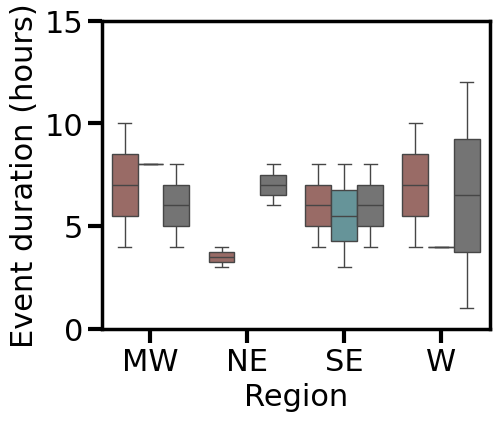

In [145]:
# plot a box and whisker plot of the durations by region and season
fig, ax = plt.subplots(figsize=(5,4))

my_palette = {'Summer': '#A1645E', 'Winter': '#5E9BA1', 'Year round': '#747474'}
sns.boxplot(x='region', y='duration', hue='season', palette=my_palette, data=durations_melted, ax=ax, legend=False)
ax.set(xlabel='Region', ylabel='Event duration (hours)', xlim=(-0.5, 3.5), yticks=np.arange(0, 17, 5))

### Same plot ^ but by ISO/RTO

  iso/rto   min_dur   max_dur
0   CAISO  1.076923  4.588235
1   ERCOT       NaN  4.000000
2   ISONE  2.857143  4.428571
3    MISO  4.000000  4.750000
4   NYISO  4.000000       NaN
5     PJM  3.750000  6.285714
6     SPP  3.500000  6.222222
7   other  3.222222  6.250000


[Text(0.5, 0, 'ISO/RTO'),
 Text(0, 0.5, 'Event duration (hours)'),
 (-0.5, 3.5),

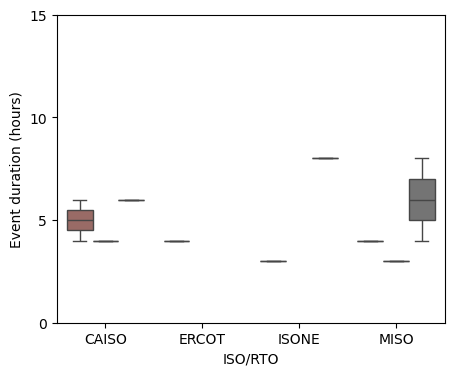

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'data/program_data/us_program_data.csv'))

# Group by iso/rto and calculate the necessary statistics
iso_rto_durations = data.groupby(['iso/rto'])[['min_dur', 'max_dur']].mean().reset_index()

# Display the iso/rto DataFrame
print(iso_rto_durations)

# Calculate the minimum and maximum durations per season for each iso/rto
durations = data.groupby(['iso/rto', 'season'])['max_dur'].agg(['min', 'max']).reset_index()

# Melt the DataFrame to long format for seaborn
durations_melted = durations.melt(id_vars=['iso/rto', 'season'], value_vars=['min', 'max'], var_name='duration_type', value_name='duration')

# replace the season such that the first letter is capitalized and replace _ with space
durations_melted['season'] = durations_melted['season'].str.capitalize().str.replace('_', ' ')

durations_melted

# plot a box and whisker plot of the durations by iso/rto and season
fig, ax = plt.subplots(figsize=(5,4))

my_palette = {'Summer': '#A1645E', 'Winter': '#5E9BA1', 'Year round': '#747474'}
sns.boxplot(x='iso/rto', y='duration', hue='season', palette=my_palette, data=durations_melted, ax=ax, legend=False)
ax.set(xlabel='ISO/RTO', ylabel='Event duration (hours)', xlim=(-0.5, 3.5), yticks=np.arange(0, 17, 5))


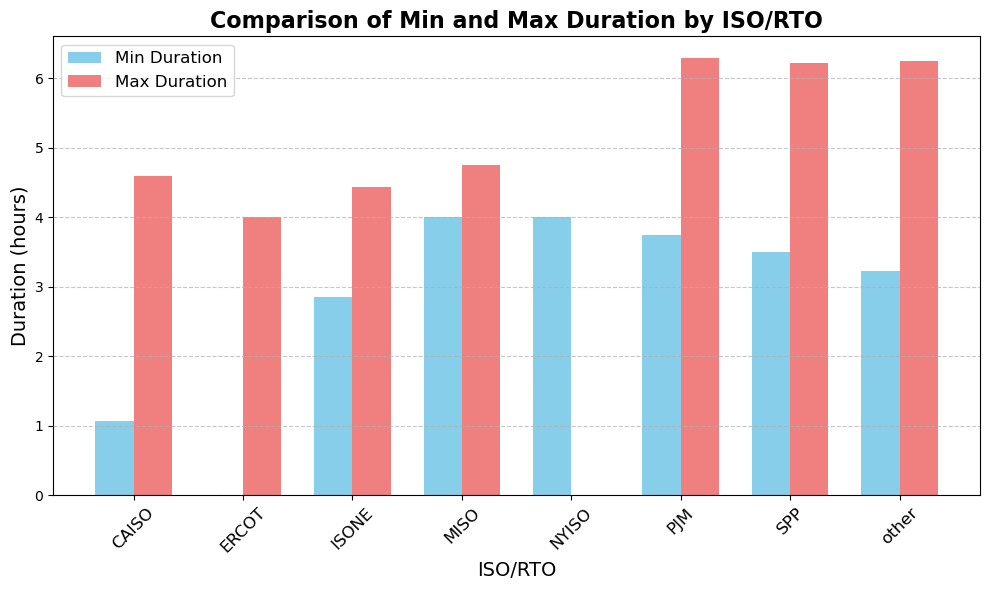

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group the data by 'iso/rto' and calculate the mean of 'min_dur' and 'max_dur'
grouped_data = data.groupby('iso/rto')[['min_dur', 'max_dur']].mean().reset_index()

# Set the positions and width for the bars
x = np.arange(len(grouped_data['iso/rto']))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, grouped_data['min_dur'], width, label='Min Duration', color='skyblue')
bars2 = ax.bar(x + width/2, grouped_data['max_dur'], width, label='Max Duration', color='lightcoral')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('ISO/RTO', fontsize=14)
ax.set_ylabel('Duration (hours)', fontsize=14)
ax.set_title('Comparison of Min and Max Duration by ISO/RTO', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(grouped_data['iso/rto'], rotation=45, fontsize=12)
ax.legend(fontsize=12)

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


### Same plot ^ but by BA

       ba   min_dur   max_dur
0    AZPS  1.000000  5.000000
1    BANC  1.000000  4.000000
2    CISO  1.000000  4.750000
3    CPLW  4.000000  8.000000
4     DUK  4.000000  7.000000
5    ERCO       NaN  4.000000
6     FPL  3.000000  6.000000
7    IPCO  2.000000  4.000000
8    ISNE  2.857143  4.428571
9    LDWP       NaN  4.000000
10   MIAO       NaN  4.000000
11   MISO  3.000000  5.750000
12  NYISO  4.000000       NaN
13   PACE       NaN       NaN
14   PACW  1.000000  4.000000
15    PJM  3.750000  6.285714
16    PNM       NaN  4.000000
17   PSCO  1.000000  4.250000
18   PSEI  1.000000       NaN
19   SOCO       NaN  8.000000
20   SWPP  3.857143  7.333333
21   TEPC  1.000000  6.000000
22    TVA       NaN  6.000000
23  other       NaN  1.000000


[Text(0.5, 0, 'Balancing Authority'),
 Text(0, 0.5, 'Event duration (hours)'),
 (-0.5, 3.5),

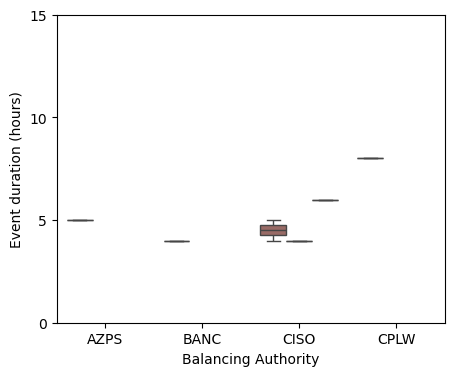

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'data/program_data/us_program_data.csv'))

# Group by iso/rto and calculate the necessary statistics
ba_durations = data.groupby(['ba'])[['min_dur', 'max_dur']].mean().reset_index()

# Display the iso/rto DataFrame
print(ba_durations)

# Calculate the minimum and maximum durations per season for each iso/rto
durations = data.groupby(['ba', 'season'])['max_dur'].agg(['min', 'max']).reset_index()

# Melt the DataFrame to long format for seaborn
durations_melted = durations.melt(id_vars=['ba', 'season'], value_vars=['min', 'max'], var_name='duration_type', value_name='duration')

# replace the season such that the first letter is capitalized and replace _ with space
durations_melted['season'] = durations_melted['season'].str.capitalize().str.replace('_', ' ')

durations_melted

# plot a box and whisker plot of the durations by iso/rto and season
fig, ax = plt.subplots(figsize=(5,4))

my_palette = {'Summer': '#A1645E', 'Winter': '#5E9BA1', 'Year round': '#747474'}
sns.boxplot(x='ba', y='duration', hue='season', palette=my_palette, data=durations_melted, ax=ax, legend=False)
ax.set(xlabel='Balancing Authority', ylabel='Event duration (hours)', xlim=(-0.5, 3.5), yticks=np.arange(0, 17, 5))

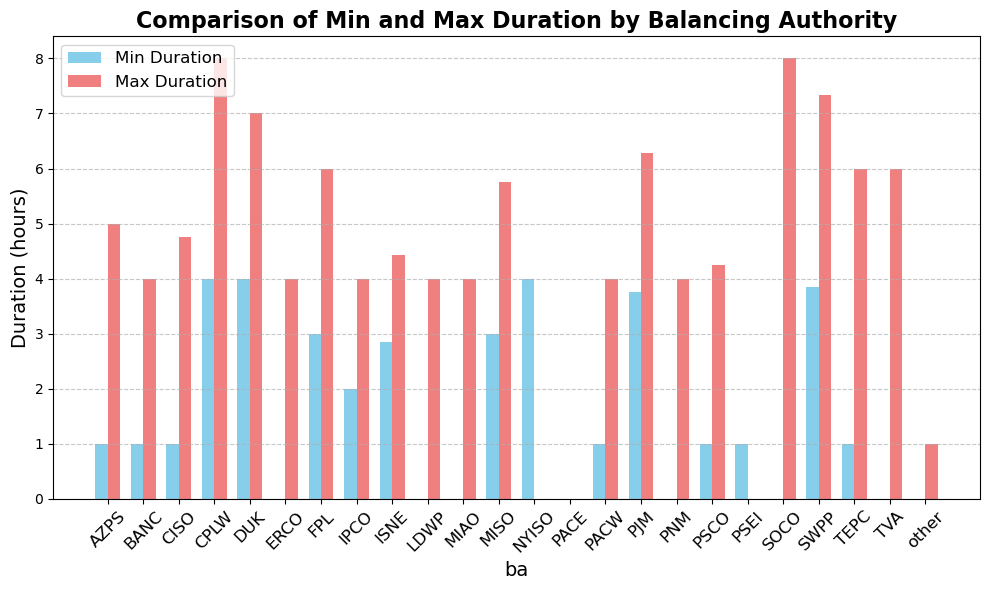

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Group the data by 'ba' and calculate the mean of 'min_dur' and 'max_dur'
grouped_data = data.groupby('ba')[['min_dur', 'max_dur']].mean().reset_index()

# Set the positions and width for the bars
x = np.arange(len(grouped_data['ba']))  
width = 0.35  

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, grouped_data['min_dur'], width, label='Min Duration', color='skyblue')
bars2 = ax.bar(x + width/2, grouped_data['max_dur'], width, label='Max Duration', color='lightcoral')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('ba', fontsize=14)
ax.set_ylabel('Duration (hours)', fontsize=14)
ax.set_title('Comparison of Min and Max Duration by Balancing Authority', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(grouped_data['ba'], rotation=45, fontsize=12)
ax.legend(fontsize=12)

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


### Box and Whiskers with no Season... 

      region      season duration_type  duration
0    midwest      summer           min       4.0
1    midwest  year_round           min       4.0
2  northeast      summer           min       3.0
3  northeast  year_round           min       6.0
4  southeast      summer           min       4.0


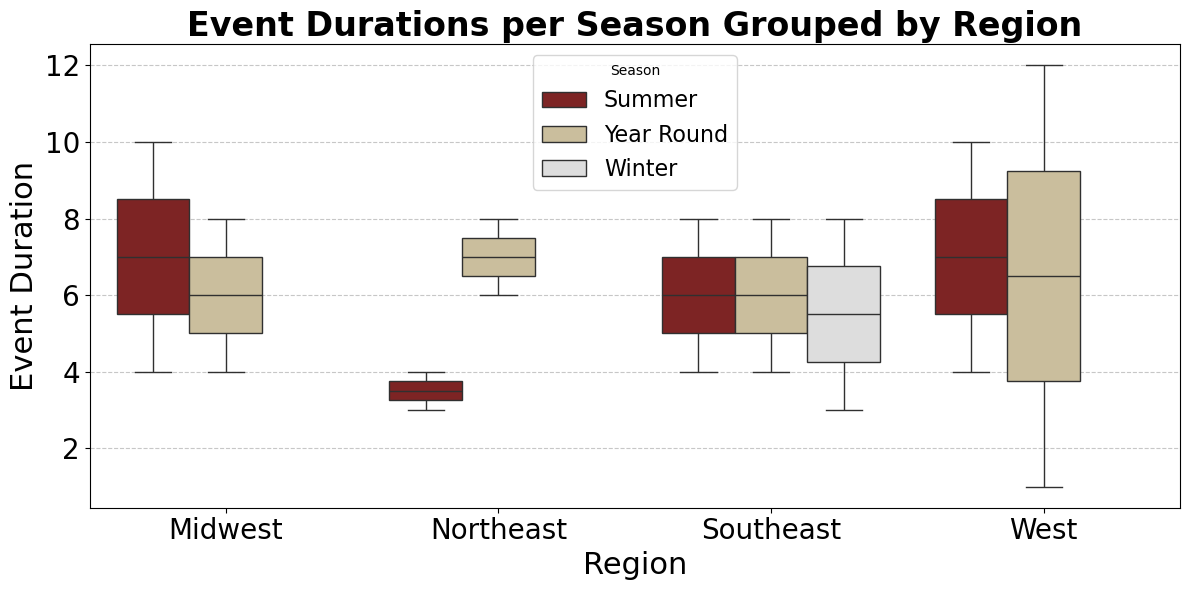

In [40]:
# Assuming your DataFrame is named 'data' and has columns 'region', 'season', and 'max_dur'

# Calculate the minimum and maximum durations per season for each region
durations = data.groupby(['region', 'season'])['max_dur'].agg(['min', 'max']).reset_index()

# Filter out specific combinations of season and region
excluded_combinations = [('winter', 'midwest'), ('winter', 'northeast'), ('winter', 'west')]
durations_filtered = durations[~durations[['season', 'region']].apply(tuple, axis=1).isin(excluded_combinations)]

# Melt the DataFrame to long format for seaborn
durations_melted = durations_filtered.melt(id_vars=['region', 'season'], value_vars=['min', 'max'], var_name='duration_type', value_name='duration')

# Check the structure of the durations_melted DataFrame
print(durations_melted.head())

# Define custom colors for each season
season_colors = {  
    'summer': '#8c1515ff',  
    'year_round': '#d2c295ff',    
    'winter': '#DDDDDD'   
}

# Create the box and whisker plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='duration', hue='season', data=durations_melted, palette=season_colors)
plt.title('Event Durations per Season Grouped by Region', fontweight='bold', fontsize=24)
plt.xlabel('Region', fontsize=22)
plt.ylabel('Event Duration', fontsize=22)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Season', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Capitalize the x-axis labels
current_labels = plt.gca().get_xticklabels()
new_labels = [label.get_text().title() for label in current_labels]
plt.xticks(ticks=range(len(new_labels)), labels=new_labels, rotation=0, fontsize=20)

# Capitalize the legend labels and remove underscores
legend = plt.gca().get_legend()
for text in legend.get_texts():
    new_text = text.get_text().replace('_', ' ').title()
    text.set_text(new_text)
    
plt.show()





Notification Type Histogram 

C:\Users\juzzz\AppData\Local\Temp\ipykernel_32128\3160881155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['notif_type'] = data_cleaned['notif_type'].replace('day_of ', 'day_of')
C:\Users\juzzz\AppData\Local\Temp\ipykernel_32128\3160881155.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['notif_type'] = data_cleaned['notif_type'].str.replace('_', ' ').str.title()


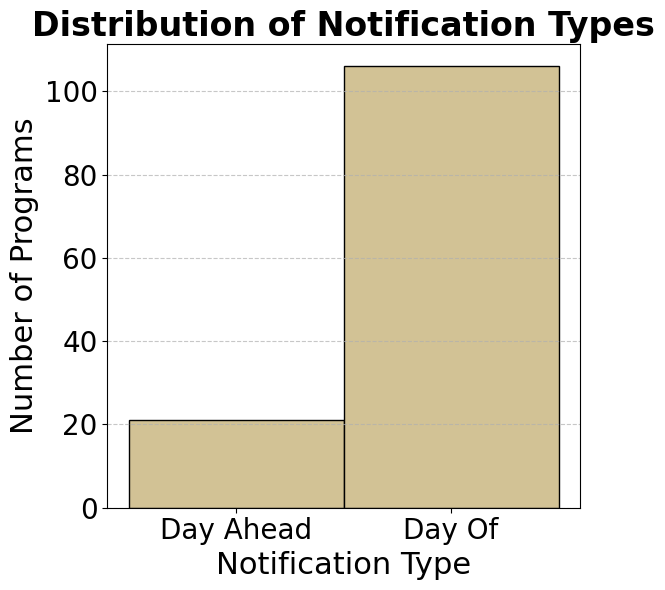

In [41]:
# Assuming your DataFrame is named 'data' and has a column 'notif_type'

# Filter out "prescheduled" and merge "day_of " into "day_of"
data_cleaned = data[data['notif_type'] != 'prescheduled']
data_cleaned['notif_type'] = data_cleaned['notif_type'].replace('day_of ', 'day_of')

# Replace underscores with spaces and capitalize the labels
data_cleaned['notif_type'] = data_cleaned['notif_type'].str.replace('_', ' ').str.title()

# Plot the histogram with combined "day_of" bars
plt.figure(figsize=(6, 6))
sns.histplot(data=data_cleaned, x='notif_type', discrete=True, kde=False, color='#d2c295', alpha=1.0)

# Customize the plot
plt.title('Distribution of Notification Types', fontweight='bold', fontsize=24)
plt.xlabel('Notification Type', fontsize=22)
plt.ylabel('Number of Programs', fontsize=22)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Box and whisker plot of notifcation time delta

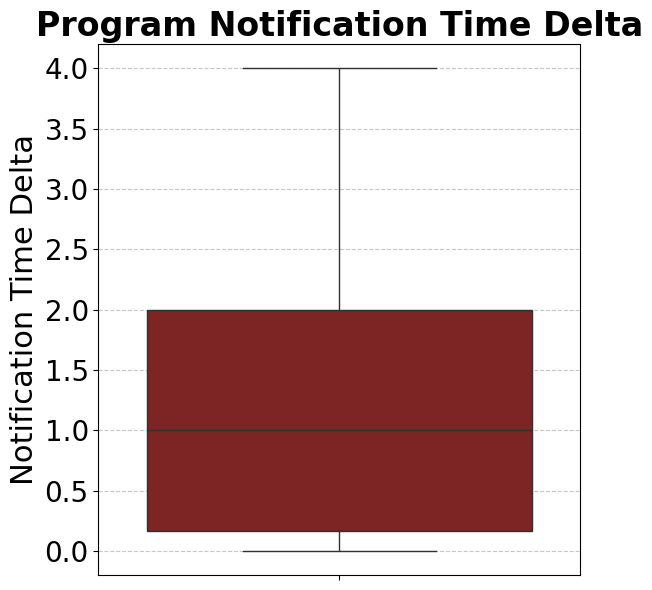

In [42]:
# Assuming your DataFrame is named 'data' and has columns 'notif_delt' and 'notif_type'

# Filter out rows where 'notif_type' is 'day_ahead'
filtered_data = data[data['notif_type'] != 'day_ahead']

# Create the box and whisker plot
plt.figure(figsize=(6, 6))  # Set the figure size
sns.boxplot(data=filtered_data, y='notif_delt', color='#8c1515ff')  # Use the same color code if needed

# Customize the plot
plt.title('Program Notification Time Delta', fontweight='bold', fontsize=24)
plt.ylabel('Notification Time Delta', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()